In [1]:
from pathlib import Path
import os
import json
script_dir = os.path.dirname(Path().absolute())
generated_snippets = json.load(open(os.path.join(script_dir, "ExtractiveSnipp/data/snippetsGenerated.txt")))
data_snippets = json.load(open(os.path.join(script_dir, "ExtractiveSnipp/data/snippets.txt")))

In [2]:
for idx, arguments in enumerate(data_snippets):
    arguments['index'] = idx
    # print(arguments)

# removing arguments with sentences less then 3
print(len(data_snippets))
count = 0
snipeet_senteces_len =  []
data_snippets_filtered = []
for argument_x in data_snippets:
    
    snip_len = len(argument_x['sentences'])
    snipeet_senteces_len.append(snip_len)
    if snip_len >= 3:
        data_snippets_filtered.append(argument_x)
        count = count + 1

print(count)

100
77


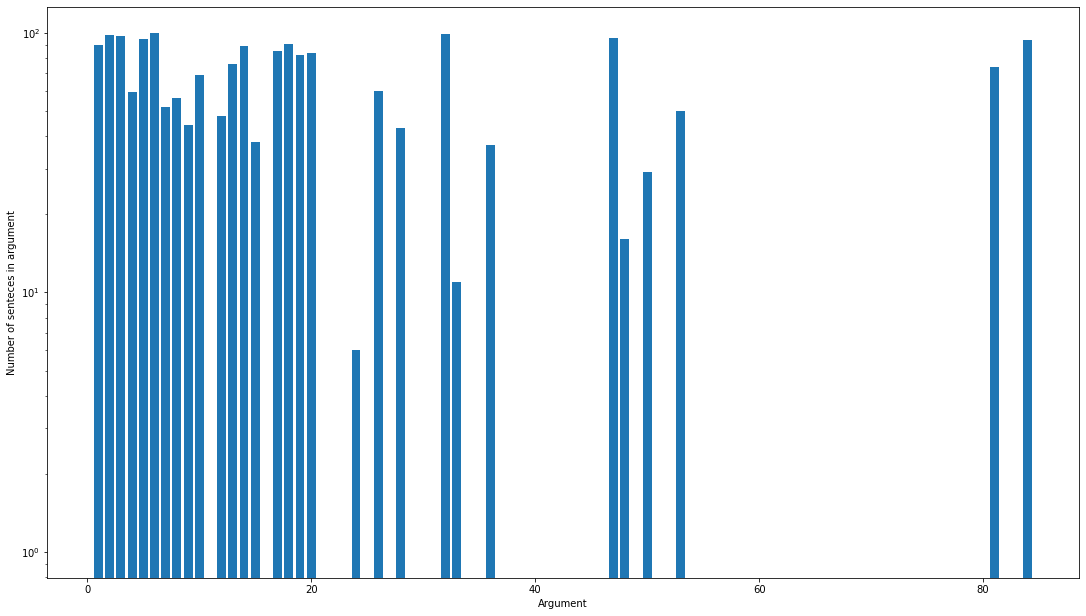

In [31]:
from matplotlib import pyplot as plt
import numpy as np
plt.bar(snipeet_senteces_len, np.arange(1,101),log=True)
plt.ylabel('Number of senteces in argument')
plt.xlabel('Argument')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.jpg', dpi=100)


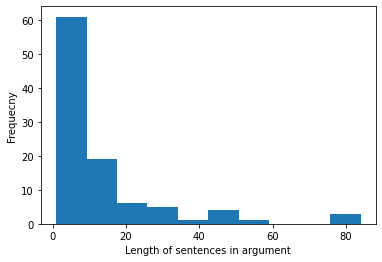

In [52]:
plt.hist(snipeet_senteces_len, )
plt.xlabel('Length of sentences in argument')
plt.ylabel('Frequecny')
fig.savefig('test2png.jpeg', dpi=100)
fig = plt.gcf()



Text(0, 0.5, 'Length of the sentences')

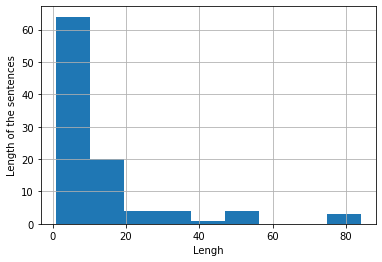

In [46]:
import pandas as pd
fig =pd.Series(snipeet_senteces_len).hist(bins =9)

fig.set_xlabel("Lengh")
fig.set_ylabel("Length of the sentences")

In [74]:
generated_snippets[0:2]

[{'snippet-title': 'Women who already had abortion earlier in there life time have abortion again.',
  'snippets-text': ['Women who already had abortion earlier in there life time have abortion again.',
   'At the age of 45 a women will have at least one abortion.'],
  'aspects': {'abortion': 0.5, 'women': 0.5},
  'sentences': "In 2011 there were about 730,322 abortions reported to the centers for disease control. There are about 1.7% of abortion of women's ages from 15-44 each year. Women who already had abortion earlier in there life time have abortion again. At the age of 45 a women will have at least one abortion. By the 12th week of pregnancies 88.7% of women have abortion. In the U.S. black women are 3.3 times likely to have an abortion than white women.",
  'id': 'abortion-01',
  'Argument :': "In 2011 there were about 730,322 abortions reported to the centers for disease control. There are about 1.7% of abortion of women's ages from 15-44 each year. Women who already had aborti

In [75]:
arg_aspects = []
for arguments in generated_snippets:
    arg_aspects.append(arguments['aspects'])
len(arg_aspects)    

50

In [76]:
len(generated_snippets)

50

In [77]:
len(data_snippets)

100

In [79]:
count = 0
data_snippets_filtered = []
for argument in data_snippets:

    # print(argument['sentences'])
    if len(argument['sentences']) > 2:
        data_snippets_filtered.append(argument)
        count = count + 1 
        
        
        
print(count)

77


In [80]:
from sklearn.model_selection import train_test_split
dev_args_set = ['feminism','death_penalty', 'brexit']
test_args =[]
dev_args  =[]
for args in data_snippets_filtered:
    if args['query'] in dev_args_set:
        dev_args.append(args)
    else:
        test_args.append(args)

In [81]:
len(test_args)

50

In [82]:
data_snippets[0:2]

[{'topic': 'Abortion',
  'query': 'abortion',
  'arg_id': 'abortion-01',
  'sentences': ['In 2011 there were about 730,322 abortions reported to the centers for disease control.',
   "There are about 1.7% of abortion of women's ages from 15-44 each year.",
   'Women who already had abortion earlier in there life time have abortion again.',
   'At the age of 45 a women will have at least one abortion.',
   'By the 12th week of pregnancies 88.7% of women have abortion.',
   'In the U.S. black women are 3.3 times likely to have an abortion than white women.'],
  'snippet': ['Women who already had abortion earlier in there life time have abortion again.',
   'At the age of 45 a women will have at least one abortion.'],
  'index': 0},
 {'topic': 'Abortion',
  'query': 'abortion',
  'arg_id': 'abortion-02',
  'sentences': ['Abortion is wrong!',
   'Abortion Is gross!',
   'Abortion is MURDER!!!!'],
  'snippet': ['Abortion is wrong!', 'Abortion is MURDER!!!!'],
  'index': 1}]

In [83]:
len(data_snippets_filtered)

77

In [84]:
count = 0
for argument in data_snippets:
    if len(argument['sentences']) <= 2:
        count +=1
print(count)      

23


In [85]:
import pandas as pd
data_snippets_df = pd.json_normalize(data_snippets_filtered)
generated_snippets_df = pd.json_normalize(generated_snippets)


In [86]:
data_snippets_df.head()

,topic,query,arg_id,sentences,snippet,index
0,Abortion,abortion,abortion-01,"[In 2011 there were about 730,322 abortions re...",[Women who already had abortion earlier in the...,0
1,Abortion,abortion,abortion-02,"[Abortion is wrong!, Abortion Is gross!, Abort...","[Abortion is wrong!, Abortion is MURDER!!!!]",1
2,Abortion,abortion,abortion-03,"[""The greatest destroyer of peace is abortion ...","[""The greatest destroyer of peace is abortion ...",2
3,abortion,abortion,abortion-04,[Yes the government has the obligation to prot...,[Yes the government has the obligation to prot...,3
4,Abortion,abortion,abortion-05,"[Thank you, Pro., Negative Case A1: False equi...",[There is no child death involved in not getti...,4


In [87]:
len(data_snippets_df)

77

In [88]:
generated_snippets_df=generated_snippets_df=generated_snippets_df.iloc[:,0:3]
generated_snippets_df.head()

,snippet-title,snippets-text,sentences
0,Women who already had abortion earlier in ther...,[Women who already had abortion earlier in the...,"In 2011 there were about 730,322 abortions rep..."
1,Abortion is MURDER!!!!,"[Abortion is wrong!, Abortion is MURDER!!!!]",Abortion is wrong! Abortion Is gross! Abortion...
2,"Abortion is a big controversial topic, people ...","[Abortion is a big controversial topic, people...","""The greatest destroyer of peace is abortion b..."
3,The most important argument against abortion w...,[The most important argument against abortion ...,Yes the government has the obligation to prote...
4,I am arguing for the right to have an abortion...,"[It follows that ""having an abortion is the eq...","Thank you, Pro. Negative Case A1: False equiva..."


In [18]:
data_snippets_df.head(2)

,topic,query,arg_id,sentences,snippet,index
0,Abortion,abortion,abortion-01,"[In 2011 there were about 730,322 abortions re...",[Women who already had abortion earlier in the...,0
1,Abortion,abortion,abortion-02,"[Abortion is wrong!, Abortion Is gross!, Abort...","[Abortion is wrong!, Abortion is MURDER!!!!]",1


In [116]:
query_list =data_snippets_df['query']

In [19]:
generated_snippets_df.head(2)

,snippet-title,snippets-text,sentences
0,Women who already had abortion earlier in ther...,[Women who already had abortion earlier in the...,"In 2011 there were about 730,322 abortions rep..."
1,Abortion is MURDER!!!!,"[Abortion is wrong!, Abortion is MURDER!!!!]",Abortion is wrong! Abortion Is gross! Abortion...


In [98]:
generated_snippets_df.insert(2,'generated_snippets',data_snippets_df['snippet'])

In [99]:
generated_snippets_df.head(2)

,snippet-title,snippets-text,generated_snippets,sentences
0,Women who already had abortion earlier in ther...,[Women who already had abortion earlier in the...,[Women who already had abortion earlier in the...,"In 2011 there were about 730,322 abortions rep..."
1,Abortion is MURDER!!!!,"[Abortion is wrong!, Abortion is MURDER!!!!]","[Abortion is wrong!, Abortion is MURDER!!!!]",Abortion is wrong! Abortion Is gross! Abortion...


In [118]:
generated_snippets_df['query'] = query_list 

In [159]:
generated_snippets_df_abotion = generated_snippets_df[generated_snippets_df["query"] == "vegan"]

In [160]:
generated_snippets_df_abotion 

,snippet-title,snippets-text,generated_snippets,sentences,query
42,"If pro doesn't redefine, I will take ""people"" ...",[You'll see me draw several parallels between ...,[You'll see me draw several parallels between ...,Thank you for the great debate topic. Pro's de...,vegan
43,Theoretical Nutrition Because Pro has no data ...,[Theoretical Nutrition Because Pro has no data...,[A balanced diet is healthiest The American He...,This debate is about a vegan diet. Vegans are ...,vegan
44,Theoretical Nutrition Because Pro has no data ...,[Theoretical Nutrition Because Pro has no data...,[A balanced diet is healthiest The American He...,This debate is about a vegan diet. Vegans are ...,vegan
45,Being vegan is a luxury and wouldn't solve any...,[Everyone being vegan is not going to create a...,[Everyone being vegan is not going to create a...,Everyone being vegan is not going to create a ...,vegan
46,"If pro doesn't redefine, I will take ""people"" ...","[If pro doesn't redefine, I will take ""people""...",[My reasons for becoming vegan : 1) Its health...,"Con, please excuse my forfeited, I have been b...",vegan
47,Why wouldn't everyone be vegan?,"[Vegan is healthy, saves animals, and the plan...","[Vegan is healthy, saves animals, and the plan...","Vegan is healthy, saves animals, and the plane...",vegan
48,Summary Beyond the Average Person Con argued t...,[Summary Beyond the Average Person Con argued ...,[Disease I've used the very best science avail...,"Con, being a much more experienced debater tha...",vegan
49,I hope pro will join the debate once again and...,[Just as it is not good for everybody to join ...,[Just as it is not good for everybody to join ...,tiff_mescudi forfeited this round. Con Since p...,vegan


In [161]:
count = 0
for index, row in generated_snippets_df_abotion.iterrows():

            # = dict object of aspect detected
            snippets_detected=row['generated_snippets']
            snippets_answer=row['snippets-text']
            #print(other_args_dict)
            for x in snippets_answer:
                for y in snippets_detected:
                    #print(x)
                    #print(y)
                    #print("-------------")
                    if x==y:
                        count= count + 0.5
                        #print('match')
                        
                        
print(count)                        
accuracy =(100.0 * count)/ (  len(generated_snippets_df_abotion))
accuracy


4.0


50.0

In [162]:
count

4.0

In [163]:
count = 0
for index, row in generated_snippets_df.iterrows():
    if row['query'] = 'abortion':
                # = dict object of aspect detected
                snippets_detected=row['generated_snippets']
                snippets_answer=row['snippets-text']
                #print(other_args_dict)
                for x in snippets_answer:
                    for y in snippets_detected:
                        #print(x)
                        #print(y)
                        #print("-------------")
                        if x==y:
                            count= count + 0.5
                            #print('match')

SyntaxError: invalid syntax (<ipython-input-163-337d38581ba0>, line 3)

In [124]:
count

22.5

In [121]:
accuracy =(100.0 * count)/ (  len(generated_snippets))
accuracy

45.0

In [ ]:
#import pickle5 as pickle
#with open("data/argumentAspectsDataset_df_re.pkl", "rb") as fh:
  #Arguments_df = pickle.load(fh)

In [ ]:
import pandas as pd 
Arguments_df = pd.read_pickle('data/ArgumentsDatasets.pkl')
Arguments_df.head(2)

In [ ]:
Arguments_df['arg_id'].nunique()

In [ ]:
arguments_datasets_aspects = Arguments_df['dict_weighted_args_dataset_list_re']
type(arguments_datasets_aspects[0])

In [ ]:
# from collections import OrderedDict
argument_similar_ids=[]
argument_similar_ids_count=[]

for dict_aspects in arg_aspects:
    print(dict_aspects)
    score=0
    arg_id_score= dict()
    arg_id_list=[]



    for aspect in dict_aspects:
        aspect_word_count=len(aspect.split())
        aspect_weight=dict_aspects[aspect]
        if aspect_weight >= 0.33:
            
            for index, row in Arguments_df.iterrows():
                    # x= dict object of aspect detected
                    other_args_dict= row['dict_weighted_args_dataset_list_re']

                    if aspect in other_args_dict and other_args_dict[aspect] >0.25:
                        arg_id=row['arg_id']
                        if arg_id in arg_id_score:
                            # print('match found')
                            # print(other_args_dict[aspect])
                        
                            # print(score)
                            # print(arg_id)
                            arg_id_score[arg_id]= score + other_args_dict[aspect]
                        #other_args_dict[aspect]= round(other_args_dict[aspect],2)
                        else:

                            score=other_args_dict[aspect]
                            arg_id_score[arg_id]=score
                            
    arg_id_score=dict(sorted(arg_id_score.items(), key=lambda item: item[1],reverse=True))
    
    #print(arg_id_score)
    argument_similar_ids.append(arg_id_score)
    #print(arg_id_score)
    
    argument_similar_ids_count.append(len(arg_id_score))
    print(len(arg_id_score))

In [ ]:
print(argument_similar_ids_count)

In [ ]:
import string
string.punctuation

In [ ]:
f = open("data\WikiAspects.txt", encoding='utf8')
aspect_list = f.read().lower().split('\n')
len(aspect_list)

In [ ]:
len(argument_similar_ids)

In [ ]:
len(argument_similar_ids[0])

In [ ]:
ArgumentativeText_args_list =[]
for argument_similar_ids_dict in argument_similar_ids:
    #print(len(argument_similar_ids_list))
    # take first 50 arguments
    argument_similar_ids_list = list(argument_similar_ids_dict.keys())
    if len(argument_similar_ids_list) <= 50: 
        argument_similar_ids_top = argument_similar_ids_list
    else:
        argument_similar_ids_top = argument_similar_ids_list[:50]  
        # print(type(argument_similar_ids_top)) 
    # print(len(argument_similar_ids_top))
    ArgumentativeText_args = []
    for argument_similar_id in argument_similar_ids_top:
        # print(argument_similar_id)
        ArgumentativeText = Arguments_df['text'][argument_similar_id] + Arguments_df['conclusion'][argument_similar_id]
        ArgumentativeText_args.append(ArgumentativeText)
    ArgumentativeText_args_list.append(ArgumentativeText_args)


In [ ]:
len(ArgumentativeText_args_list)

In [ ]:
ArgumentativeText_args_list[-1]

In [ ]:
 Arguments_df['conclusion'][10939]

In [ ]:
Arguments_df['conclusion'][10939] + Arguments_df['text'][10939] 

In [90]:
len(test_args)

50

In [66]:
len(generated_snippets)


50

In [91]:
count = 0
for sentence_index in range(0, len(test_args), 1):
    actual_snippets = test_args[sentence_index]['snippet']

    generated_snippet = generated_snippets[sentence_index]['snippets-text']

    for x in actual_snippets:
        for y in generated_snippet:
            if x == y:
                count += 0.5

print(count)
accuracy = (100.0 * count) / len(test_args)
print("Accuracy ", accuracy)


22.5
Accuracy  45.0
